# Introduction to Exploritory Analysis

reference https://trenton3983.github.io/files/projects/2019-07-10_statistical_thinking_1/2019-07-10_statistical_thinking_1.html

In [5]:
import numpy as np

versicolor_petal_length = [4.7, 4.5, 4.9 ,4., 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4.,  4.7, 3.6, 4.4, 4.5, 4.1,
 4.5, 3.9, 4.8, 4.,  4.9, 4.7, 4.3, 4.4, 4.8, 5.,  4.5, 3.5, 3.8, 3.7, 3.9, 5.1, 4.5, 4.5,
 4.7, 4.4, 4.1, 4.,  4.4, 4.6, 4.,  3.3, 4.2, 4.2, 4.2, 4.3, 3.,  4.1]

# Specify array of percentiles: percentiles
percentiles = np.array([2.5, 25, 50, 75, 97.5])

# Compute percentiles: ptiles_vers
ptiles_vers = np.percentile(versicolor_petal_length, percentiles, axis=0)

# Print the result
print(ptiles_vers)

[3.3    4.     4.35   4.6    4.9775]


In [5]:
pip install matplotlib

     |████████████████████████████████| 7.2 MB 1.2 MB/s eta 0:00:01
     |████████████████████████████████| 2.8 MB 1.6 MB/s eta 0:00:01
     |████████████████████████████████| 61 kB 165 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


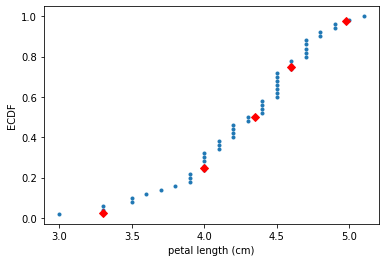

In [7]:
import matplotlib.pyplot as plt

x_vers = [3.,  3.3, 3.3, 3.5, 3.5, 3.6, 3.7, 3.8, 3.9, 3.9, 3.9, 4.,  4.,  4.,  4.,  4.,  4.1, 4.1,
         4.1, 4.2, 4.2, 4.2, 4.2, 4.3, 4.3, 4.4, 4.4, 4.4, 4.4, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5,
         4.6, 4.6, 4.6, 4.7, 4.7, 4.7, 4.7, 4.7, 4.8, 4.8, 4.9, 4.9, 5.,  5.1]

y_vers = [0.02, 0.04, 0.06, 0.08, 0.1,  0.12, 0.14, 0.16, 0.18, 0.2,  0.22, 0.24, 0.26, 0.28,
         0.3,  0.32, 0.34, 0.36, 0.38, 0.4,  0.42, 0.44, 0.46, 0.48, 0.5,  0.52, 0.54, 0.56,
         0.58, 0.6,  0.62, 0.64, 0.66, 0.68, 0.7,  0.72, 0.74, 0.76, 0.78, 0.8,  0.82, 0.84,
         0.86, 0.88, 0.9,  0.92, 0.94, 0.96, 0.98, 1.  ]

# Plot the ECDF
_ = plt.plot(x_vers, y_vers, '.')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Overlay percentiles as red diamonds.
_ = plt.plot(ptiles_vers, percentiles/100, marker='D', color='red',
         linestyle='none')

# Show the plot
plt.show()

Data Files Location

Most data files for the exercises can be found on the <a href="https://campus.datacamp.com/courses/statistical-thinking-in-python-part-1/quantitative-exploratory-data-analysis?ex=7">course site</a> <br>
<ul>
    <li>
        <a href="https://assets.datacamp.com/production/repositories/469/datasets/8fb59b9a99957c3b9b1c82b623aea54d8ccbcd9f/2008_all_states.csv">2008 election results (all states)
    </li>
    <li>
        <a href="https://assets.datacamp.com/production/repositories/469/datasets/e079fddb581197780e1a7b7af2aeeff7242535f0/2008_swing_states.csv">2008 election results (swing states)
    </li>
    <li>
        <a href="https://assets.datacamp.com/production/repositories/469/datasets/7507bfed990379f246b4f166ea8a57ecf31c6c9d/belmont.csv">Belmont Stakes
    </li>
    <li>
        <a href="https://assets.datacamp.com/production/repositories/469/datasets/df23780d215774ff90be0ea93e53f4fb5ebbade8/michelson_speed_of_light.csv">Speed of light
    </li>
</ul>

In [14]:
pip install pandas; pip install seaborn; pip install sklearn

     |████████████████████████████████| 7.2 MB 3.0 MB/s eta 0:00:01
     |████████████████████████████████| 303 kB 3.2 MB/s eta 0:00:01
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1316 sha256=5297bfb3794f7c9ed7945ff6e007684019a74a41acc1e6009acd718de8b7132b
  Stored in directory: /Users/muhammadyasin/Library/Caches/pip/wheels/22/0b/40/fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built sklearn
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np
from pprint import pprint as pp
import csv
from pathlib import Path
import seaborn as sns
from scipy.stats import binom

from sklearn.datasets import load_iris

### Data FILE

In [5]:
data = Path('../data/') / 'data' / '2019-07-10_statistical_thinking_1'
elections_all_file = data / '2008_all_states.csv'
elections_swing_file = data / '2008_swing_states.csv'
belmont_file = data / 'belmont.csv'
sol_file = data / 'michelson_speed_of_light.csv'

### IRISH DATA

In [6]:
iris = load_iris()
iris_df = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])
iris_df.head()

def iris_typing(x):
    types = {0.0: 'setosa',
             1.0: 'versicolour',
             2.0: 'virginica'}
    return types[x]

print("after normalize")
iris_df['species'] = iris_df.target.apply(iris_typing)
iris_df.head()

after normalize


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


### Box-and-whisker plot

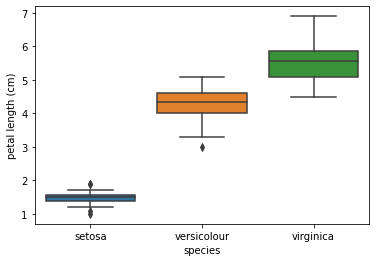

In [6]:
# Create box plot with Seaborn's default settings
_ = sns.boxplot(x='species', y='petal length (cm)', data=iris_df)

# Label the axes
_ = plt.ylabel('petal length (cm)')
_ = plt.xlabel('species')


# Show the plot
plt.show()

In [7]:
versicolor_petal_length = [4.7, 4.5, 4.9, 4.,  4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4.,  4.7, 3.6, 4.4, 4.5, 4.1,
 4.5, 3.9, 4.8, 4.,  4.9, 4.7, 4.3, 4.4, 4.8, 5.,  4.5, 3.5, 3.8, 3.7, 3.9, 5.1, 4.5, 4.5,
 4.7, 4.4, 4.1, 4.,  4.4, 4.6, 4.,  3.3, 4.2, 4.2, 4.2, 4.3, 3.,  4.1]

# Array of differences to mean: differences
differences = versicolor_petal_length - np.mean(versicolor_petal_length)

# Square the differences: diff_sq
diff_sq = differences**2

# Compute the mean square difference: variance_explicit
variance_explicit = np.mean(diff_sq)

# Compute the variance using NumPy: variance_np
variance_np = np.var(versicolor_petal_length)

# Print the results
print(variance_explicit, variance_np)

0.21640000000000004 0.21640000000000004


In [10]:
# Compute the variance: variance
variance = np.var(versicolor_petal_length)

# Print the square root of the variance
print(np.sqrt(variance))

# Print the standard deviation
print(np.std(versicolor_petal_length))

0.4651881339845203
0.4651881339845203


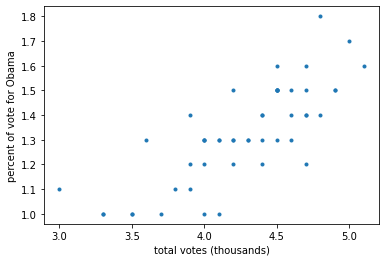

In [8]:
from matplotlib import pyplot as plt


versicolor_petal_width = [1.4, 1.5, 1.5, 1.3, 1.5, 1.3, 1.6, 1.,  1.3, 1.4, 1.,  1.5, 1.,  1.4, 1.3, 1.4, 1.5, 1.,
 1.5, 1.1, 1.8, 1.3, 1.5, 1.2, 1.3, 1.4, 1.4, 1.7, 1.5, 1.,  1.1, 1.,  1.2, 1.6, 1.5, 1.6,
 1.5, 1.3, 1.3, 1.3, 1.2, 1.4, 1.2, 1.,  1.3, 1.2, 1.3, 1.3, 1.1, 1.3]

# Make a scatter plot
_ = plt.plot(versicolor_petal_length, versicolor_petal_width, marker='.', linestyle='none')


# Label the axes
_ = plt.xlabel('total votes (thousands)')
_ = plt.ylabel('percent of vote for Obama')

# Show the result
plt.show()

In [11]:
# Compute the covariance matrix: covariance_matrix 
covariance_matrix = np.cov(versicolor_petal_length, versicolor_petal_width)

# Print covariance matrix
print(covariance_matrix)

# Extract covariance of length and width of petals: petal_cov
petal_cov = covariance_matrix[0, 1]


# Print the length/width covariance
print(petal_cov)


[[0.22081633 0.07310204]
 [0.07310204 0.03910612]]
0.07310204081632653


In [9]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat

    corr_mat = np.corrcoef(x, y)
    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for I. versicolor: r
r = pearson_r(versicolor_petal_length, versicolor_petal_width)

# Print the result
print(r)

0.7866680885228169
